In [8]:
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain_google_vertexai import ChatVertexAI
from typing import TypedDict, Annotated
from langchain_core.messages import BaseMessage, HumanMessage
from langgraph.checkpoint.memory import MemorySaver
llm=ChatVertexAI(model_name="gemini-2.5-pro")

In [2]:
class ChatState(TypedDict):
    messages:Annotated[list[BaseMessage],add_messages]

In [3]:
def chat_node(state:ChatState):
    # take user query from state
    messages=state['messages']
    # send to llm
    response=llm.invoke(messages)
    # response store into state
    return {'messages':[response]}

In [9]:
checkpointer=MemorySaver()
graph=StateGraph(ChatState)

graph.add_node('chat_node',chat_node)

graph.add_edge(START,'chat_node')
graph.add_edge('chat_node',END)

workflow=graph.compile(checkpointer=checkpointer)

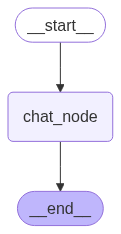

In [5]:
workflow

In [6]:
initial_message={
    'messages':HumanMessage(content="What is the capital of India")
}
workflow.invoke(initial_message)['messages'][-1].content

'The capital of India is **New Delhi**.'

In [11]:
thread_id='1'

while True:
    user_message=input("Type Here: ")
    print("User:",user_message)
    if user_message.strip().lower() in ['exit','quit','bye']:
        break
    else:
        config={'configurable':{'thread_id':thread_id}}
        response=workflow.invoke({'messages':[HumanMessage(content=user_message)]},config=config)
        print("AI:",response['messages'][-1].content)

User: add 10 and 15
AI: 10 + 15 = 25
User: now square the number
AI: 25 squared (25 x 25) is 625.
User: exit


In [14]:
workflow.get_state(config=config)

StateSnapshot(values={'messages': [HumanMessage(content='Hi', additional_kwargs={}, response_metadata={}, id='20be8b19-f496-4739-a090-9f09c19f662d'), AIMessage(content='Hello there! How can I help you today?', additional_kwargs={}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 1, 'candidates_token_count': 10, 'total_token_count': 457, 'prompt_tokens_details': [{'modality': 1, 'token_count': 1}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 10}], 'thoughts_token_count': 446, 'cached_content_token_count': 0, 'cache_tokens_details': []}, 'finish_reason': 'STOP', 'avg_logprobs': -8.574069213867187, 'model_name': 'gemini-2.5-pro'}, id='run--70409d63-5585-4208-98d8-d09aa744ebe9-0', usage_metadata={'input_tokens': 1, 'output_tokens': 10, 'total_tokens': 457, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 446}}), HumanMessage(content='What was me previous query', additional_kwargs={}, resp